done in  9650  iterations


/var/folders/87/hlqv70yd0n79wj330vzqffx10y2fzc/T/ipykernel_31528/86153080.py:35: UserWarning: No contour levels were found within the data range.
  plt.contour(X, Y, _vals.reshape(X.shape), levels=[-0.01,0.,0.01])


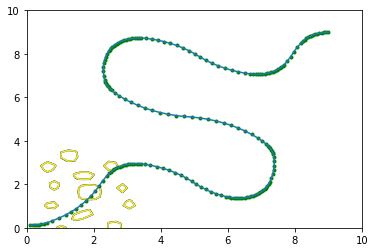

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import jax.numpy as jnp
from jax import vmap

from build_solver import build_erg_time_opt_solver

import pickle as pkl

args = {
    'N' : 200, 
    'x0' : np.array([0.1, 0.12, 0.]),
    'xf' : np.array([9.0, 9.0, 0.]),
    'erg_ub' : 0.01,
    'alpha' : 0.2,
    'wrksp_bnds' : np.array([[0.,10],[0.,10]])
}
solver, obs = build_erg_time_opt_solver(args)
solver.solve(max_iter=10000, alpha=1.001, eps=1e-7)
sol = solver.get_solution()

## <---- below draws the objects ---->
# for obs in traj_opt.obs:
#     _patch = obs.draw()
#     plt.gca().add_patch(_patch)

X, Y = np.meshgrid(*[np.linspace(wks[0],wks[1]) for wks in args['wrksp_bnds']])
pnts = np.vstack([X.ravel(), Y.ravel()]).T

_mixed_vals = np.inf * np.ones_like(X)
for ob in obs:
    _vals = np.array([ob.distance(pnt) for pnt in pnts]).reshape(X.shape)
    _mixed_vals = np.minimum(_vals, _mixed_vals)

    plt.contour(X, Y, _vals.reshape(X.shape), levels=[-0.01,0.,0.01])

plt.plot(sol['x'][:,0], sol['x'][:,1],'g.')
plt.plot(sol['x'][:,0], sol['x'][:,1])

# sol.update({
#     'x' : np.array(sol['x']),
#     'u' : np.array(sol['u']),
#     'tf': np.array(sol['tf'])
# })

# _file = open('test_traj_max_erg_002.pkl', 'wb')
# pkl.dump(sol, _file)

plt.show()

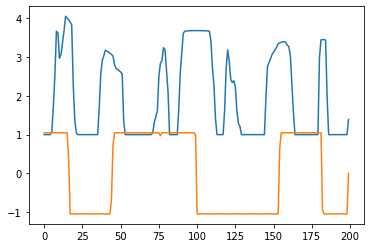

In [6]:
plt.plot(sol['u'])

In [3]:
solver.dual_solution['mu']

DeviceArray([7.51300062e+05, 0.00000000e+00, 3.85140419e+01,
             2.97265701e+01, 1.51533031e+01, 1.07440338e+01,
             0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
             0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
             0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
             0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
             0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
             0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
             3.82591782e+01, 4.28825340e+01, 4.54455833e+01,
             5.24513016e+01, 5.08048286e+01, 5.48951683e+01,
             5.00172005e+01, 5.14520187e+01, 4.40148773e+01,
             4.33001404e+01, 3.40065002e+01, 3.17842979e+01,
             2.13339005e+01, 1.82747097e+01, 0.00000000e+00,
             0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
             0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
             0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
             0.00000000e

In [4]:
solver.ineq_constr(sol, args)

DeviceArray([ 2.7338086e-02, -1.3362553e+01, -2.5844574e-04,
              2.5779009e-04, -2.6226044e-04,  2.5850534e-04,
             -5.4430962e-04, -6.5032721e-02, -7.2669947e-01,
             -1.5135381e+00, -2.6698821e+00, -2.6302760e+00,
             -1.9716985e+00, -2.0700769e+00, -2.3639951e+00,
             -2.6791706e+00, -3.0572224e+00, -3.0144720e+00,
             -2.9593101e+00, -2.9039309e+00, -2.8415849e+00,
             -1.2824976e+00, -3.9190149e-01, -4.9019217e-02,
              3.8093328e-04,  1.5091896e-04, -2.0527840e-04,
              2.2423267e-04, -2.3376942e-04,  2.4205446e-04,
             -2.4569035e-04,  2.4926662e-04, -2.4974346e-04,
              2.5075674e-04, -2.5081635e-04,  2.5081635e-04,
             -2.5045872e-04,  2.5111437e-04, -6.9193137e-01,
             -1.5720820e+00, -1.9178226e+00, -2.0373878e+00,
             -2.1789293e+00, -2.1582763e+00, -2.1330390e+00,
             -2.1035113e+00, -2.0696678e+00, -2.0293791e+00,
             -1.8103564e

In [5]:
sol['tf']

DeviceArray(13.362553, dtype=float32, weak_type=True)